># B20AI003 PRML Bonus Project

>## Heart Disease Prediction based on US CDC's Behavioral Risk Factor Surveillance System (BRFSS)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Origins of dataset: https://www.cdc.gov/brfss/about/index.htm

Cleaned Dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [2]:
df=pd.read_csv('CDC_heartdata_2020.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


---

## Peeking at the Dataset

In [3]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

Roughly 10% of reports have HeartDisease as Positive

In [7]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [8]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [9]:
df.drop("Race",axis=1,inplace=True)

Decided to drop Race column because of my Project being targeted for an Indian Audience

---

## Visualising Trends in Data

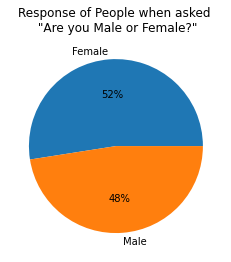

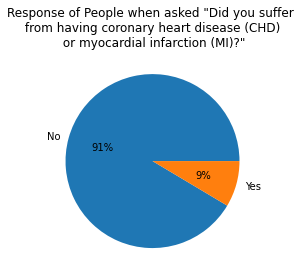

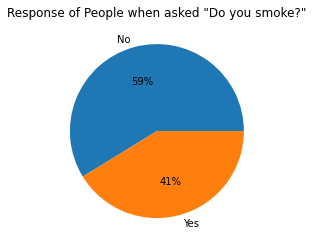

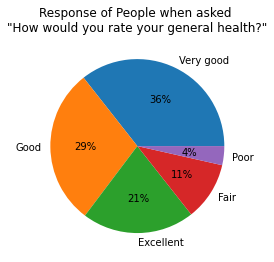

In [10]:
plt.pie([x for x in df['Sex'].value_counts()], labels=np.array(df['Sex'].value_counts().index),autopct='%1.0f%%')
plt.title('Response of People when asked \n "Are you Male or Female?"')
plt.show()

plt.pie([x for x in df['HeartDisease'].value_counts()], labels=np.array(df['HeartDisease'].value_counts().index),autopct='%1.0f%%')
plt.title('Response of People when asked "Did you suffer \n from having coronary heart disease (CHD) \n or myocardial infarction (MI)?"')
plt.show()


plt.pie([x for x in df['Smoking'].value_counts()], labels=np.array(df['Smoking'].value_counts().index),autopct='%1.0f%%')
plt.title('Response of People when asked "Do you smoke?"')
plt.show()

plt.pie([x for x in df['GenHealth'].value_counts()], labels=np.array(df['GenHealth'].value_counts().index),autopct='%1.0f%%')
plt.title('Response of People when asked \n"How would you rate your general health?"')
plt.show()

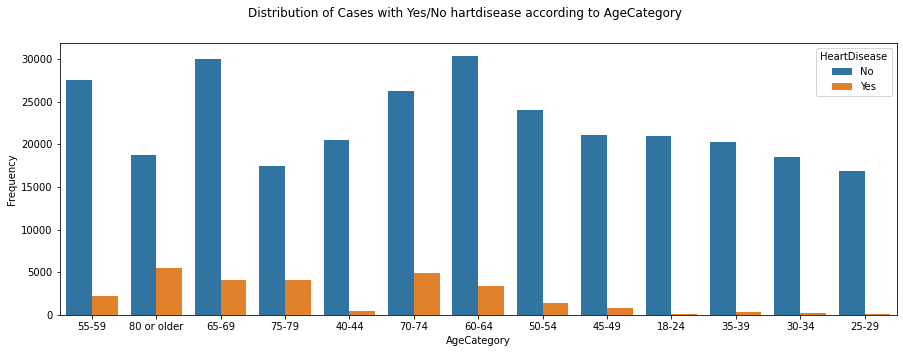

In [11]:
plt.figure(figsize = (15,5))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df)
plt.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()

<Figure size 1080x360 with 0 Axes>

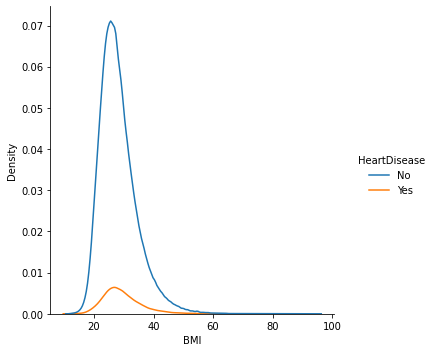

In [12]:
plt.figure(figsize = (15,5))
sns.displot(data=df, x="BMI",kind="kde",hue="HeartDisease")
plt.show()

We can see an increase in HeartDisease in people with BMI between 20 & 40

## Encoding Categorical Columns

In [13]:
le_heart=LabelEncoder()
df['HeartDisease']=le_heart.fit_transform(df['HeartDisease'])
le_smoking=LabelEncoder()
df['Smoking']=le_smoking.fit_transform(df['Smoking'])
le_alcohol=LabelEncoder()
df['AlcoholDrinking']=le_alcohol.fit_transform(df['AlcoholDrinking'])
le_stroke=LabelEncoder()
df['Stroke']=le_stroke.fit_transform(df['Stroke'])
le_walk=LabelEncoder()
df['DiffWalking']=le_walk.fit_transform(df['DiffWalking'])
le_sex=LabelEncoder()
df['Sex']=le_sex.fit_transform(df['Sex'])
le_age=LabelEncoder()
df['AgeCategory']=le_age.fit_transform(df['AgeCategory'])
le_diabetes=LabelEncoder()
df['Diabetic']=le_diabetes.fit_transform(df['Diabetic'])
le_exercise=LabelEncoder()
df['PhysicalActivity']=le_exercise.fit_transform(df['PhysicalActivity'])
le_health=LabelEncoder()
df['GenHealth']=le_health.fit_transform(df['GenHealth'])
le_asthma=LabelEncoder()
df['Asthma']=le_asthma.fit_transform(df['Asthma'])
le_kidney=LabelEncoder()
df['KidneyDisease']=le_kidney.fit_transform(df['KidneyDisease'])
le_cancer=LabelEncoder()
df['SkinCancer']=le_cancer.fit_transform(df['SkinCancer'])

In [14]:
df['Diabetic'].unique()

array([2, 0, 1, 3])

In [15]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,1,4,8.0,0,0,0


---

## Normalising the Data

In [16]:
scaler=StandardScaler()

In [17]:
normalisecolumns= list(df.select_dtypes(include=['int64','float64']).columns)
normalisecolumns

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [18]:
df[normalisecolumns] = scaler.fit_transform(df[normalisecolumns])

In [19]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,0,7,2,1,4,-1.460354,1,0,1
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,0,12,0,1,4,-0.067601,0,0,0
2,0,-0.274603,1,0,0,2.091388,3.281069,0,1,9,2,1,1,0.628776,1,0,0
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,0,11,0,0,2,-0.763977,0,0,1
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,0,4,0,1,4,0.628776,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,-0.144019,1,0,0,0.456341,-0.490039,1,1,8,2,0,1,-0.763977,1,0,0
319791,0,0.238291,1,0,0,-0.424070,-0.490039,0,1,3,0,1,4,-1.460354,1,0,0
319792,0,-0.642753,0,0,0,-0.424070,-0.490039,0,0,5,0,1,2,-0.763977,0,0,0
319793,0,0.705560,0,0,0,-0.424070,-0.490039,0,0,1,0,0,2,3.414282,0,0,0


---

## Creating Predictor & Target Variables

In [20]:
X=df.drop(['HeartDisease'],axis=1)
y=df[['HeartDisease']]

In [21]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42, stratify=y)

In [22]:
y_train['HeartDisease'].value_counts()

0    204695
1     19161
Name: HeartDisease, dtype: int64

In [23]:
y_test['HeartDisease'].value_counts()

0    87727
1     8212
Name: HeartDisease, dtype: int64

---

## Performing OverSampling

In [24]:
oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [25]:
y_over['HeartDisease'].value_counts()

0    204695
1    204695
Name: HeartDisease, dtype: int64

In [26]:
X_train, X_test2, y_train, y_test2 = tts(X_over, y_over, test_size=0.3, random_state=42, stratify=y_over)

# Trying different Models

---

In [27]:
accuracy_list=[]
precision_list=[]
recall_list=[]

## LightGBM

In [28]:
import lightgbm as lgb

In [29]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)

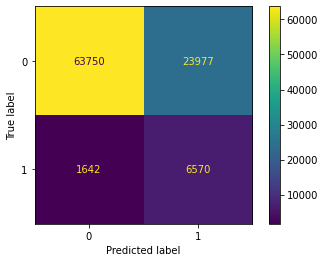

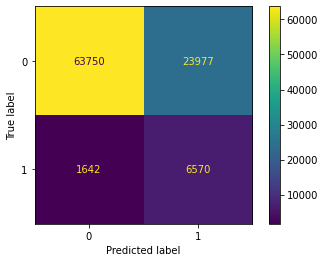

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred).plot()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     87727
           1       0.22      0.80      0.34      8212

    accuracy                           0.73     95939
   macro avg       0.59      0.76      0.59     95939
weighted avg       0.91      0.73      0.79     95939



In [32]:
accuracy_list.append(accuracy_score(y_test,y_pred))
precision_list.append(precision_score(y_test,y_pred))
recall_list.append(recall_score(y_test, y_pred))

---

## Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)

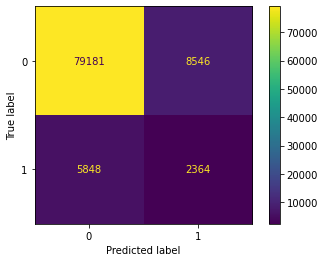

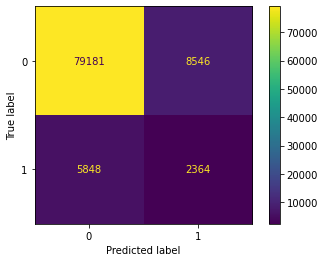

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred).plot()

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     87727
           1       0.22      0.29      0.25      8212

    accuracy                           0.85     95939
   macro avg       0.57      0.60      0.58     95939
weighted avg       0.87      0.85      0.86     95939



In [37]:
accuracy_list.append(accuracy_score(y_test,y_pred))
precision_list.append(precision_score(y_test,y_pred))
recall_list.append(recall_score(y_test, y_pred))

---

## Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier()
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)

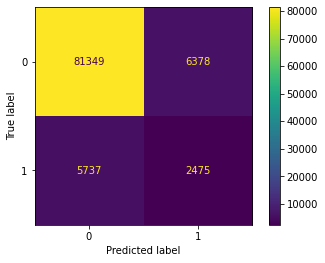

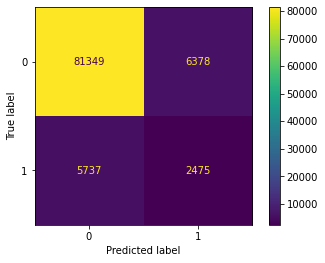

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred).plot()

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     87727
           1       0.28      0.30      0.29      8212

    accuracy                           0.87     95939
   macro avg       0.61      0.61      0.61     95939
weighted avg       0.88      0.87      0.88     95939



In [42]:
accuracy_list.append(accuracy_score(y_test,y_pred))
precision_list.append(precision_score(y_test,y_pred))
recall_list.append(recall_score(y_test, y_pred))

---

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)

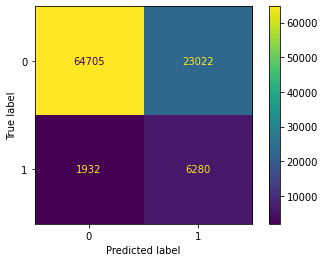

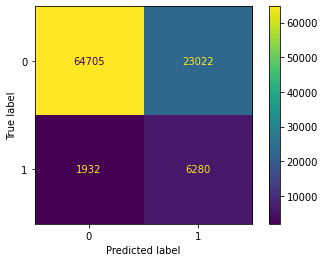

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred).plot()

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     87727
           1       0.21      0.76      0.33      8212

    accuracy                           0.74     95939
   macro avg       0.59      0.75      0.59     95939
weighted avg       0.91      0.74      0.80     95939



In [47]:
accuracy_list.append(accuracy_score(y_test,y_pred))
precision_list.append(precision_score(y_test,y_pred))
recall_list.append(recall_score(y_test, y_pred))

---

## Neural Network

In [48]:
import torch 
import torch.nn as nn
from sklearn.utils import shuffle
from torch.autograd import Variable

In [49]:
X_trainNN=X_train.values
X_testNN=X_test.values
y_trainNN=y_train.values
y_testNN=y_test.values

In [50]:
y_testNN.shape

(95939, 1)

In [51]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cuda



In [52]:
batch_size = 64
num_epochs = 25
num_classes=2
learning_rate = 0.01
size_hidden_11 = 100
size_hidden_12 = 100


batch_no = len(X_trainNN) // batch_size  
cols = X_trainNN.shape[1] 

In [53]:
class Net(nn.Module):
    def __init__(self, num_inputs, size_hidden_11, size_hidden_12, n_output):
        super(Net, self).__init__()
        self.hidden_layer_1 = nn.Linear(num_inputs, size_hidden_11)  
        self.activation_1 = nn.Tanh() # activation layer
        self.hidden_layer_2 = nn.Linear(num_inputs, size_hidden_12)  
        self.activation_2 = nn.Tanh() # activation layer
        
        self.output_layer = nn.Linear(size_hidden_11, n_output)   
        self.output_act = nn.Sigmoid()

    
    def forward(self, x):
        x1 = self.activation_1(self.hidden_layer_1(x))     
        x2= self.activation_2(self.hidden_layer_2(x))      
        x3 = torch.add(x2,x1)
        res = self.output_act(self.output_layer(x3))                   
        return res
net = Net(cols, size_hidden_11, size_hidden_12, num_classes).to(device)
print(net)

Net(
  (hidden_layer_1): Linear(in_features=16, out_features=100, bias=True)
  (activation_1): Tanh()
  (hidden_layer_2): Linear(in_features=16, out_features=100, bias=True)
  (activation_2): Tanh()
  (output_layer): Linear(in_features=100, out_features=2, bias=True)
  (output_act): Sigmoid()
)


In [54]:
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
loss_func = nn.CrossEntropyLoss()

In [55]:
def accuracy_(logit, target, batch_size):
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = (corrects/batch_size)*100
    return accuracy.item()

In [56]:

for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    X_train3, y_train3 = shuffle(X_trainNN, y_trainNN)

    train_acc = 0.0
    running_loss = 0.0

    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train3[start:end]).to(device))
        # print(inputs.shape)
        labels = Variable(torch.LongTensor(y_train3[start:end]).to(device))
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # print(outputs.shape)

        # print(labels)
        # loss = criterion(outputs, torch.unsqueeze(labels, dim=1)
        labels = torch.flatten(labels)
        loss = loss_func(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        acc = accuracy_(outputs, labels, batch_size)
        train_acc += acc
         
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch+1, running_loss / (i+1), train_acc/(i+1)))  
    running_loss = 0.0

Epoch: 1 | Loss: 0.5918 | Train Accuracy: 71.05
Epoch: 2 | Loss: 0.5587 | Train Accuracy: 74.30
Epoch: 3 | Loss: 0.5506 | Train Accuracy: 75.09
Epoch: 4 | Loss: 0.5463 | Train Accuracy: 75.49
Epoch: 5 | Loss: 0.5434 | Train Accuracy: 75.75
Epoch: 6 | Loss: 0.5415 | Train Accuracy: 75.92
Epoch: 7 | Loss: 0.5401 | Train Accuracy: 76.07
Epoch: 8 | Loss: 0.5390 | Train Accuracy: 76.13
Epoch: 9 | Loss: 0.5381 | Train Accuracy: 76.26
Epoch: 10 | Loss: 0.5376 | Train Accuracy: 76.28
Epoch: 11 | Loss: 0.5371 | Train Accuracy: 76.35
Epoch: 12 | Loss: 0.5367 | Train Accuracy: 76.40
Epoch: 13 | Loss: 0.5364 | Train Accuracy: 76.42
Epoch: 14 | Loss: 0.5362 | Train Accuracy: 76.45
Epoch: 15 | Loss: 0.5360 | Train Accuracy: 76.45
Epoch: 16 | Loss: 0.5358 | Train Accuracy: 76.47
Epoch: 17 | Loss: 0.5357 | Train Accuracy: 76.49
Epoch: 18 | Loss: 0.5355 | Train Accuracy: 76.49
Epoch: 19 | Loss: 0.5354 | Train Accuracy: 76.51
Epoch: 20 | Loss: 0.5353 | Train Accuracy: 76.50
Epoch: 21 | Loss: 0.5352 | Tr

In [57]:
batch_no = len(X_testNN) // batch_size 
n_correct = 0
n_samples = 0
n_tp=0
n_tn=0
n_fn=0
n_fp=0
for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    X_test3, y_test3 = shuffle(X_testNN, y_testNN)

    test_acc = 0.0
    running_loss = 0.0

    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_test3[start:end]).to(device))
        # print(inputs.shape)
        labels = Variable(torch.LongTensor(y_test3[start:end]).to(device))
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        
        # print(outputs.shape)

        # print(labels)
        # loss = criterion(outputs, torch.unsqueeze(labels, dim=1)
        labels = torch.flatten(labels)
        loss = loss_func(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        n_tp += ((predicted == 1) & (labels == 1)).sum().item()
        n_tn += ((predicted == 0) & (labels == 0)).sum().item()
        n_fp += ((predicted == 1) & (labels == 0)).sum().item()
        n_fn += ((predicted == 0) & (labels == 1)).sum().item()
        acc = accuracy_(outputs, labels, batch_size)
        test_acc += acc
         
    print('Epoch: %d | Loss: %.4f | Test Accuracy: %.2f' \
          %(epoch+1, running_loss / (i+1), test_acc/(i+1)))  
    running_loss = 0.0

n_tp=n_tp/num_epochs
n_tn=n_tn/num_epochs
n_fp=n_fp/num_epochs
n_fn=n_fn/num_epochs
n_samples=n_samples/num_epochs

Epoch: 1 | Loss: 0.3978 | Test Accuracy: 91.36
Epoch: 2 | Loss: 0.3962 | Test Accuracy: 91.54
Epoch: 3 | Loss: 0.3960 | Test Accuracy: 91.56
Epoch: 4 | Loss: 0.3959 | Test Accuracy: 91.56
Epoch: 5 | Loss: 0.3958 | Test Accuracy: 91.55
Epoch: 6 | Loss: 0.3958 | Test Accuracy: 91.56
Epoch: 7 | Loss: 0.3957 | Test Accuracy: 91.55
Epoch: 8 | Loss: 0.3956 | Test Accuracy: 91.57
Epoch: 9 | Loss: 0.3956 | Test Accuracy: 91.56
Epoch: 10 | Loss: 0.3955 | Test Accuracy: 91.56
Epoch: 11 | Loss: 0.3955 | Test Accuracy: 91.57
Epoch: 12 | Loss: 0.3955 | Test Accuracy: 91.57
Epoch: 13 | Loss: 0.3955 | Test Accuracy: 91.57
Epoch: 14 | Loss: 0.3955 | Test Accuracy: 91.59
Epoch: 15 | Loss: 0.3954 | Test Accuracy: 91.59
Epoch: 16 | Loss: 0.3954 | Test Accuracy: 91.59
Epoch: 17 | Loss: 0.3954 | Test Accuracy: 91.58
Epoch: 18 | Loss: 0.3954 | Test Accuracy: 91.57
Epoch: 19 | Loss: 0.3954 | Test Accuracy: 91.58
Epoch: 20 | Loss: 0.3953 | Test Accuracy: 91.59
Epoch: 21 | Loss: 0.3953 | Test Accuracy: 91.59
E

In [58]:
acc = (n_tp+n_tn) / n_samples
rec= n_tp / (n_tp+n_fn)
prec= n_tp / (n_tp+n_fp)
print(n_tp)
print(f'Accuracy of the network is: {100*acc} %')
print(f'Recall of the network is: {100*rec} %')
print(f'Precision of the network is: {100*prec} %')

589.84
Accuracy of the network is: 91.56437625083389 %
Recall of the network is: 7.182939422870838 %
Precision of the network is: 55.60331825037708 %


---

In [59]:
accuracy_list.append(acc)
recall_list.append(rec)
precision_list.append(prec)

---

## Visualising Performance of Different Models

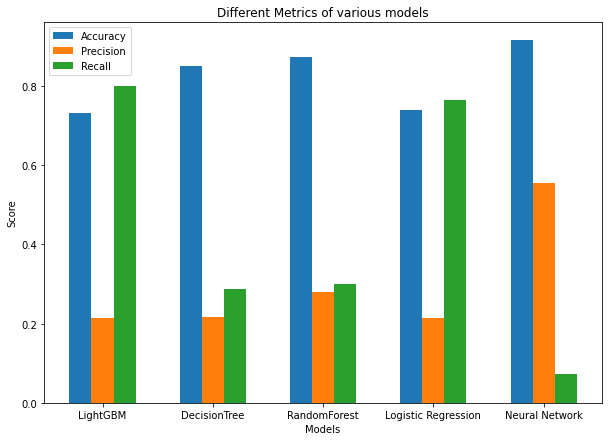

In [60]:
X_axis=np.arange(5)
plt.figure(figsize=(10,7))
plt.bar(X_axis - 0.2, accuracy_list, 0.2, label = 'Accuracy')
plt.bar(X_axis, precision_list, 0.2, label = 'Precision')
plt.bar(X_axis + 0.2, recall_list, 0.2, label = 'Recall')
  
plt.xticks(X_axis, ['LightGBM', 'DecisionTree', 'RandomForest', 'Logistic Regression', 'Neural Network'])
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Different Metrics of various models")
plt.legend()
plt.show()

Since False Negatives would be disasterous for diagnosis of a Heart Disease, we will choose the model with the highest Recall (Sensitivity)

---

## Parameter Tuning

In [61]:
params = {'max_depth':[6,8,10,12,14,16]}

In [62]:
scoring=['recall','precision']

In [63]:
optimal_params= GridSearchCV(estimator=lgb.LGBMClassifier(),param_grid=params,scoring=scoring,refit="recall",verbose=0,cv=5,n_jobs=-1)

In [64]:
optimal_params.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 14, 16]}, refit='recall',
             scoring=['recall', 'precision'])

In [65]:
optimal_params.best_params_

{'max_depth': 16}

In [66]:
tunedmodel = optimal_params.best_estimator_
tunedmodel.fit(X_train, y_train.values.ravel())

LGBMClassifier(max_depth=16)

In [67]:
y_pred = tunedmodel.predict(X_test)

In [68]:
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     87727
           1       0.22      0.80      0.34      8212

    accuracy                           0.73     95939
   macro avg       0.59      0.76      0.59     95939
weighted avg       0.91      0.73      0.79     95939



---

## Storing the Model to be used by the App Program

In [69]:
import pickle

In [70]:
data={"model":tunedmodel,"scaler":scaler,"le_smoking":le_smoking,"le_alcohol":le_alcohol,
      "le_stroke":le_stroke,"le_age":le_age,"le_exercise":le_exercise,"le_health":le_health,
      "le_asthma":le_asthma,"le_kidney":le_kidney,"le_cancer":le_cancer,
      "le_diabetes":le_diabetes,"le_sex":le_sex,"le_walk":le_walk,"le_heart":le_heart}
      
with open('C:\\Users\\amant\\Desktop\\Edu\\Codes\\PRML\\BonusProject\\saved_model.pkl', 'wb') as file:
    pickle.dump(data,file)

---

## Testing Stored Model

In [71]:
with open('C:\\Users\\amant\\Desktop\\Edu\\Codes\\PRML\\BonusProject\\saved_model.pkl', 'rb') as file:
    data=pickle.load(file)

In [72]:
newmodel= data['model']

In [73]:
y_pred=newmodel.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     87727
           1       0.22      0.80      0.34      8212

    accuracy                           0.73     95939
   macro avg       0.59      0.76      0.59     95939
weighted avg       0.91      0.73      0.79     95939



---

## Creating Pipeline

In [75]:
class Pipeline:
    def __init__(self,model,scaler,X_encoder,y_encoder,X_train,y_train,X_test,y_test,X_categorical_columns,y_categorical_columns,normalisecolumns):
        self.model=model
        self.scaler=scaler
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.X_encoder=X_encoder
        self.y_encoder=y_encoder
        self.X_categorical_columns=X_categorical_columns
        self.y_categorical_columns=y_categorical_columns
        self.normalisecolumns=normalisecolumns

    def fit_transform(self):

        '''
        First Scales the data and then encodes the categorical columns
        '''

        self.X_train[self.normalisecolumns]=self.scaler.fit_transform(self.X_train[self.normalisecolumns])
        self.X_test[self.normalisecolumns]=self.scaler.transform(self.X_test[self.normalisecolumns])
        self.X_train[self.X_categorical_columns]=self.X_encoder.fit_transform(self.X_train[self.X_categorical_columns])
        self.X_test[self.X_categorical_columns]=self.X_encoder.transform(self.X_test[self.X_categorical_columns])
        self.y_train[self.y_categorical_columns]=self.y_encoder.fit_transform(self.y_train[self.y_categorical_columns])
        self.y_test[self.y_categorical_columns]=self.y_encoder.transform(self.y_test[self.y_categorical_columns])
        print("Successfully Scaled and encoded the data")

    def fit(self):

        '''
        Fits the model
        '''

        self.model.fit(self.X_train,self.y_train.values.ravel())
        return self.model

    def classification_report(self):
        '''
        Prints the classification report of the model
        '''

        y_pred=self.model.predict(self.X_test)
        print(classification_report(self.y_test,y_pred))


In [76]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [77]:
df=pd.read_csv('CDC_heartdata_2020.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [78]:
X=df.drop(['HeartDisease'],axis=1)
y=df[['HeartDisease']]
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42, stratify=y)
oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test2, y_train, y_test2 = tts(X_over, y_over, test_size=0.3, random_state=42, stratify=y_over)

In [79]:
X_categorical_columns= list(X_train.select_dtypes(include=['object']).columns)
X_categorical_columns           #categorical columns in predictor columns

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [80]:
y_categorical_columns= list(y_train.select_dtypes(include=['object']).columns)
y_categorical_columns           #catgorical columns in target column

['HeartDisease']

In [81]:
normalisecolumns= list(df.select_dtypes(include=['int64','float64']).columns)
normalisecolumns                #numerical columns in dataframe

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [82]:
pipe=Pipeline(tunedmodel,scaler=scaler,X_encoder=MultiColumnLabelEncoder(X_categorical_columns),
            y_encoder=MultiColumnLabelEncoder(y_categorical_columns),
            X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,X_categorical_columns=X_categorical_columns,
            y_categorical_columns=y_categorical_columns,normalisecolumns=normalisecolumns)

In [83]:
pipe.fit_transform()

Successfully Scaled and encoded the data


In [84]:
model=pipe.fit()
model

LGBMClassifier(max_depth=16)

In [85]:
pipe.classification_report()

              precision    recall  f1-score   support

           0       0.97      0.73      0.84     87727
           1       0.22      0.80      0.34      8212

    accuracy                           0.74     95939
   macro avg       0.60      0.77      0.59     95939
weighted avg       0.91      0.74      0.79     95939

